# BDA GROUP 13 PROJECT

| No| Name| Matric Number | Task Distribution
| :- | :- | :- | :-
| 1. | Fatimah binti Mohd Nizam| 17218825| Codes & Objectives
| 2. | Xu Yizheng | 17198425/2| Codes & Methodology
| 3. | Sharvind Gopal| S2018303| Codes & Introduction
| 4. | Lu Xian Ding | 17096993| Codes & Discussion
| 5. | Nurfarhana binti Omar | 17198278| Codes & Result

### PART 1

#### 1.1 Market Basket Analysis

**INTRODUCTION**

**Frequent Itemset** 

is a method for Market Basket Analysis. It involves sets of items with a defined minimum frequency. The set of items that equals or exceeds the minimum frequency is considered as a frequent itemset. It is utilized to find the frequently bought together items in the shopping behaviors of customers in a supermarket or in an online shopping platform. 


**Association Rule** 

mining has two essential phases: the first phase is to figure out the high frequency from the collected data and the second stage is to calculate the confidence value from the first stage result (Foxiao Zhan, 2019).  

  
The latter stage is executed to identify all Large frequency sets items from the original data set. The minimum support threshold is identified to filter the itemsets that fulfilled the frequency requirement. 


**Support** 

is a measurement on how common or popular the items appear in the original dataset. The second stage is to generate involves confidence in its association rule mining process. 


**Confidence** 

is defined on how likely an item is purchased will affect the possibility for another item to be purchased. For example, confidence is a measurement of the proportion of transactions of item X with item Y appearing together. The drawback of confidence is that it only takes the item X’s popularity instead of considering both. This could mislead the representation of the association importance. 


**Lift**

There is another measurement called **lift** that controls the popularity of item Y while measuring how likely item Y will be purchased when item X is purchased. It is the ratio of the observed support to the expected if the two rules were independent from each other. 

A lift value that is greater than 1 means that item Y is likely to be purchase with item X while a lift value which is less than 1 indicates the vice versa. Besides that, conviction is a measurement that implies on the strength of the rule from statistical independence (Dinesh J. Prajapati, 2017). It is defined: 

  
**Conviction** 

compares the probability that X appears without Y when they are dependent with each other with the actual frequency of the appearance X without Y. Conviction will have a value of 1 when the Items X and Y are completely unrelated. It is a directed measure because it also takes the value of appearance of X without Y into consideration.

**OBJECTIVE OF THE REPORT**

1. To perform Frequent Itemsets and Association Rules Mining towards a dataset that contains a list of items to analyze which items are frequently bought together.

2. To analyze the pattern and insight from the analysis based on the support, confidence, lift and conviction results. 

**METHODOLOGY** <br>

Frequent itemset and Association rules mining are used to evaluate which items are frequently bought together in the data that has been collected. The Market_Basket_Data.csv is used in the study to study the implementation of frequent itemset and association rule. The data is initially cleaned to identify the amount of missing or null values. The missing or null values are ignored because the list of missing items does not affect the result of the methods used. Exploratory Data Analysis (EDA) process involves in visualizing the top popular items by using WordCloud. The frequency of the most popular items are plotted by using matplotlib. Networkx library is used to discover the top item choices in the dataset. 

The modelling process is involved with implementing the A-priori algorithm to determine which antecedent items and	consequent items are frequently bought together. The support, confidence, lift and conviction results are identified to understand deeper regarding the itemset purchase. 

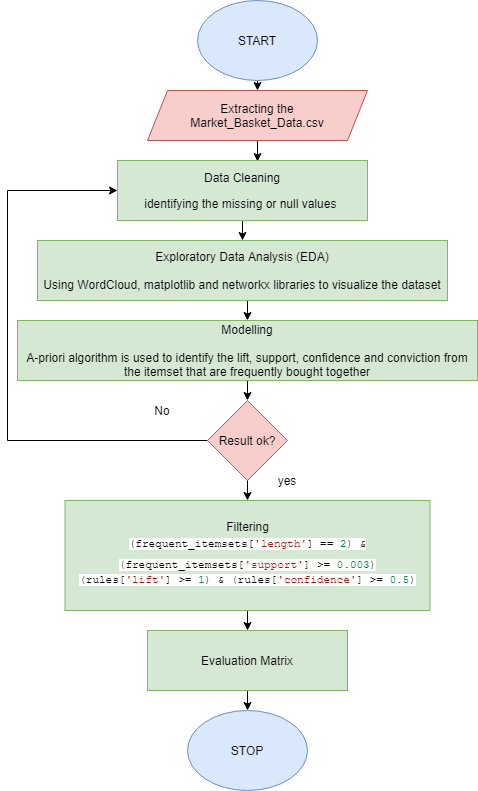

In [1]:
from IPython.display import Image
Image(filename='BDA.png')

**INTRODUCTION TO DATASET**

This dataset contains 7501 observations which showing groceries items and what usually being bought together with the items. Each observation contains different volume of columns but the most highest column is 20.Any null value is replaced with NaN.

#### 1. Data Extraction

In [2]:
!pip install squarify

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
# for basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
plt.style.use('fivethirtyeight')

# for market basket analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [5]:
# Assign url of file: url
url = 'https://raw.githubusercontent.com/FanaOmar/Market-Basket/main/Market_Basket_Data.csv'

# Read file into a DataFrame: df
df = pd.read_csv(url, header= None)

# Print the head of the DataFrame
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 2. Data Understanding

In [6]:
df.shape

(7501, 20)

There are 7501 observations in 20 features in the dataset.

In [7]:
# Print few rows from the bottom of the DataFrame
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7500,eggs,frozen smoothie,yogurt cake,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# checking the random entries in the data
df.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
718,chocolate,grated cheese,mineral water,salmon,whole wheat rice,burger sauce,escalope,mushroom cream sauce,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3520,chocolate,spaghetti,mineral water,soup,pancakes,eggs,hand protein bar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6751,chocolate,frozen vegetables,whole wheat pasta,mineral water,olive oil,energy bar,chicken,white wine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5144,mineral water,chicken,blueberries,fresh bread,white wine,magazines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5069,fresh tuna,frozen vegetables,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2444,cake,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021,tomatoes,eggs,chicken,chocolate bread,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4155,fresh tuna,mineral water,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6195,burgers,almonds,eggs,chicken,light mayo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2280,ground beef,milk,cake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,protein bar,frozen smoothie,protein bar,cereals,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [10]:
#To check null values
df.isnull().sum()

0        0
1     1754
2     3112
3     4156
4     4972
5     5637
6     6132
7     6520
8     6847
9     7106
10    7245
11    7347
12    7414
13    7454
14    7476
15    7493
16    7497
17    7497
18    7498
19    7500
dtype: int64

The NAN values are ignored due to the large amount of items in several columns are not identified. This will not affect our analysis process using A-priori algorithm.

#### 3. Exploratory Data Analysis (EDA)

In [11]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3.7 -m pip install --upgrade pip' command.


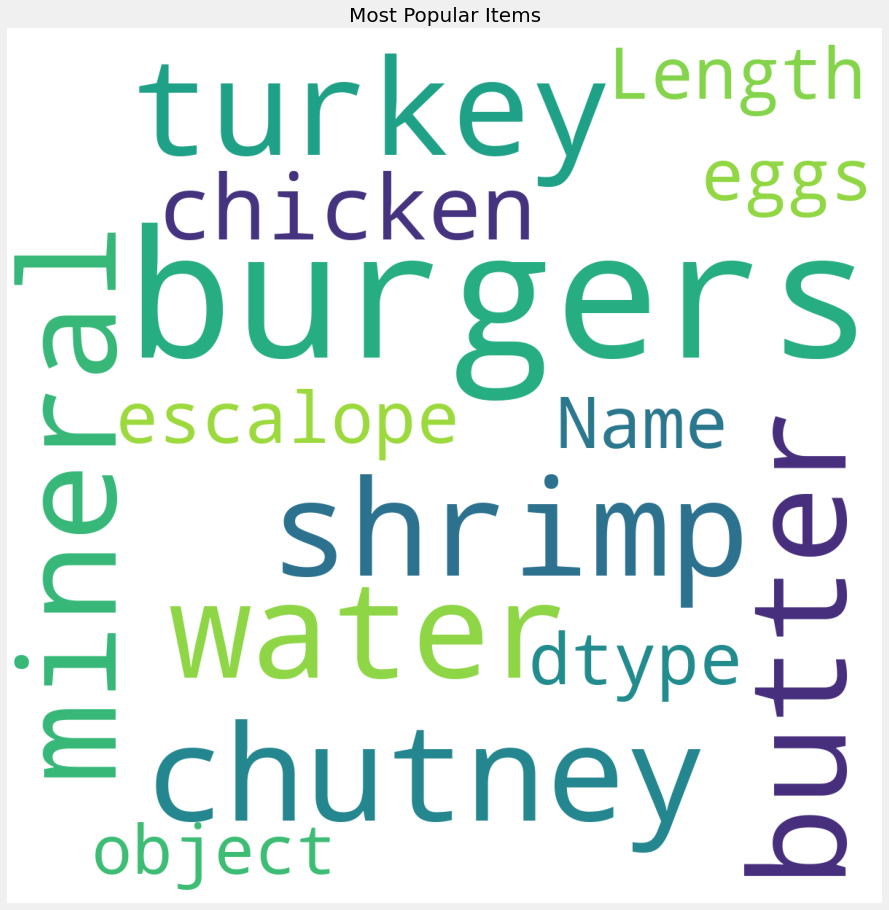

In [12]:
# Data Visualization
# Create Wordcloud to visualize the most popular items in the DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(df[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

The most popular items in the data set are burgers, shrimp, turkey, mineral and many more. These are the items that the customers usually purchased.

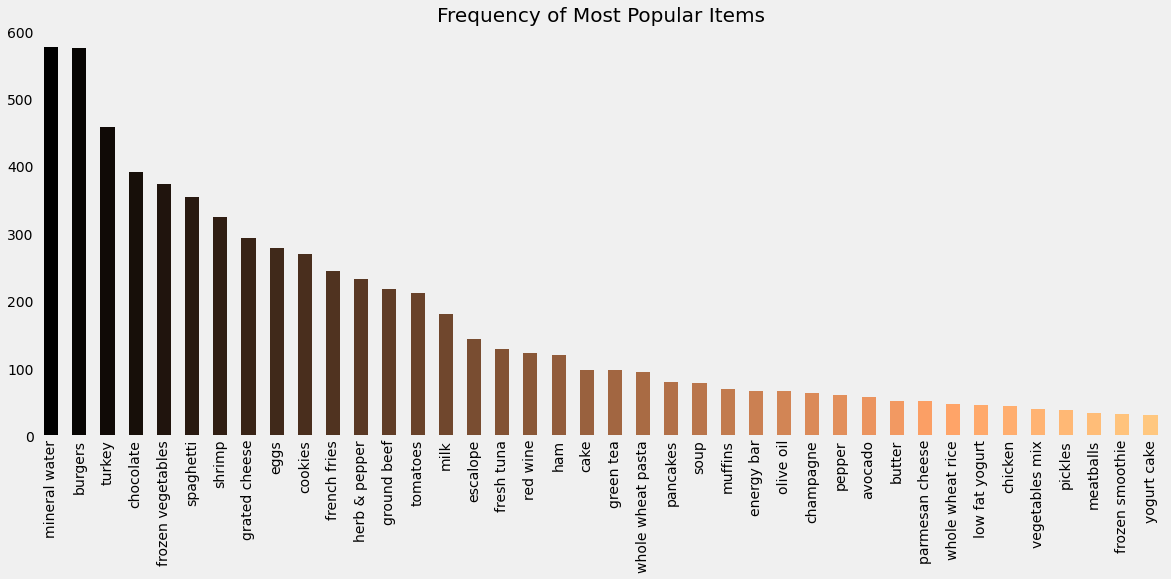

In [13]:
# Create a graph to visualize the frequency of most popular items 

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
df[0].value_counts().head(40).plot.bar(color = color)
plt.title('Frequency of Most Popular Items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

 Mineral water is the highest item purchased in the store.

In [15]:
df['food'] = 'Food'
food = df.truncate(before = -1, after = 15)


import networkx as nx

food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)

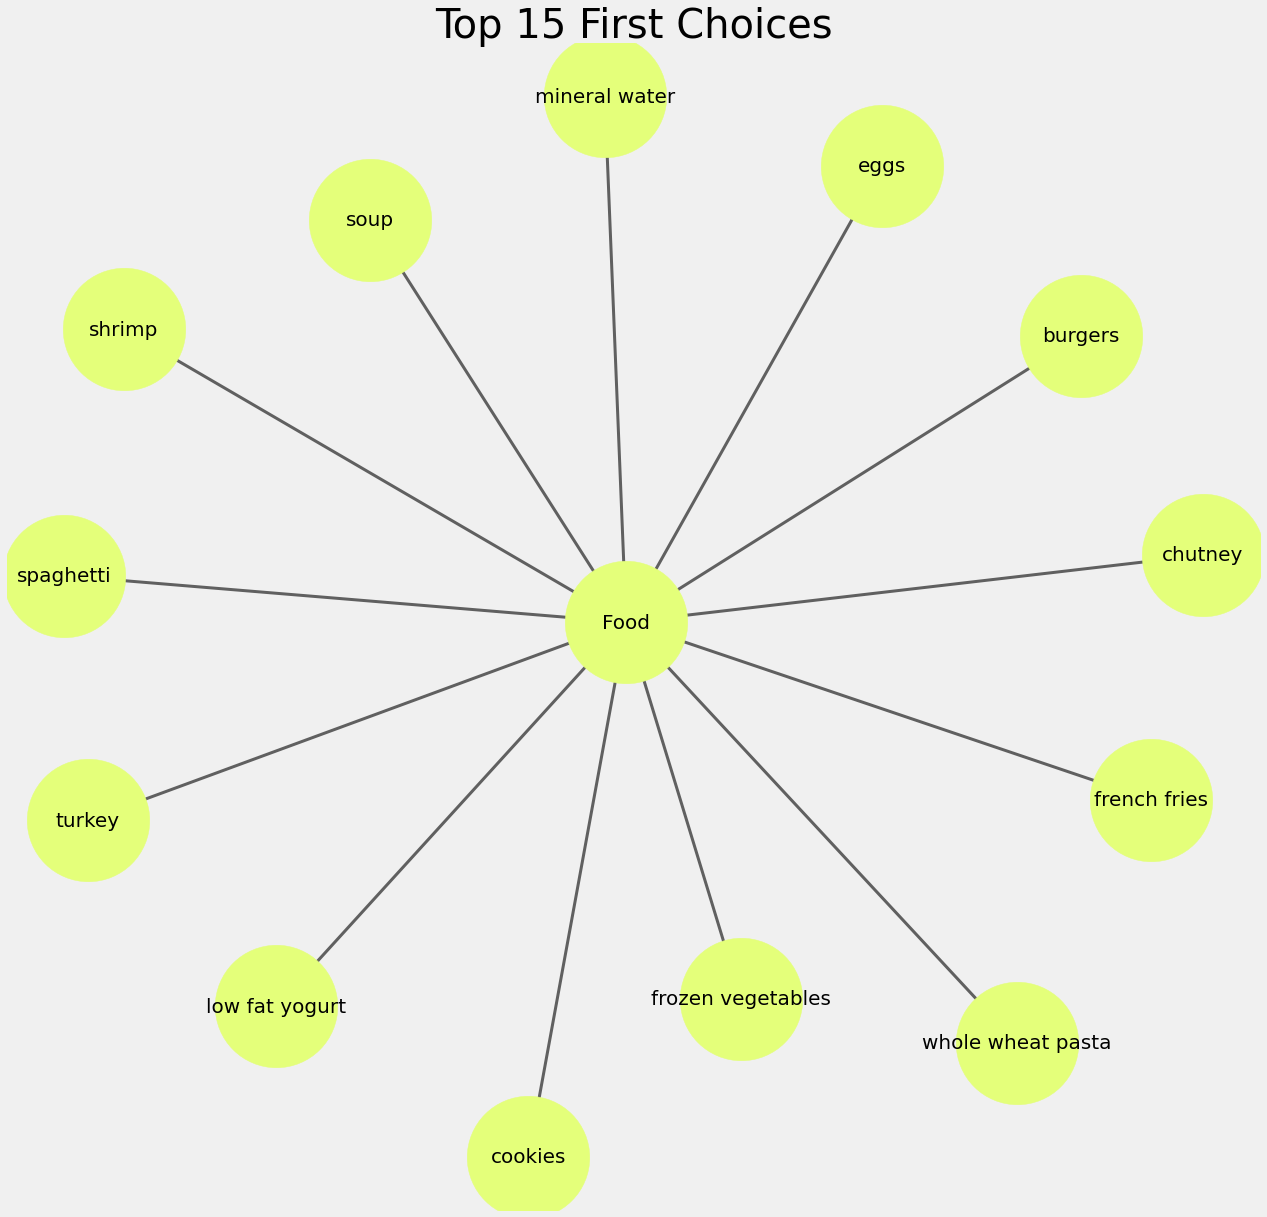

In [16]:
# To visualize Top 15 First Choices
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(food)
color = plt.cm.Wistia(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 40)
plt.show()

In [17]:
df['secondchoice'] = 'Second Choice'
secondchoice = df.truncate(before = -1, after = 15)
secondchoice = nx.from_pandas_edgelist(secondchoice, source = 'food', target = 1, edge_attr = True)

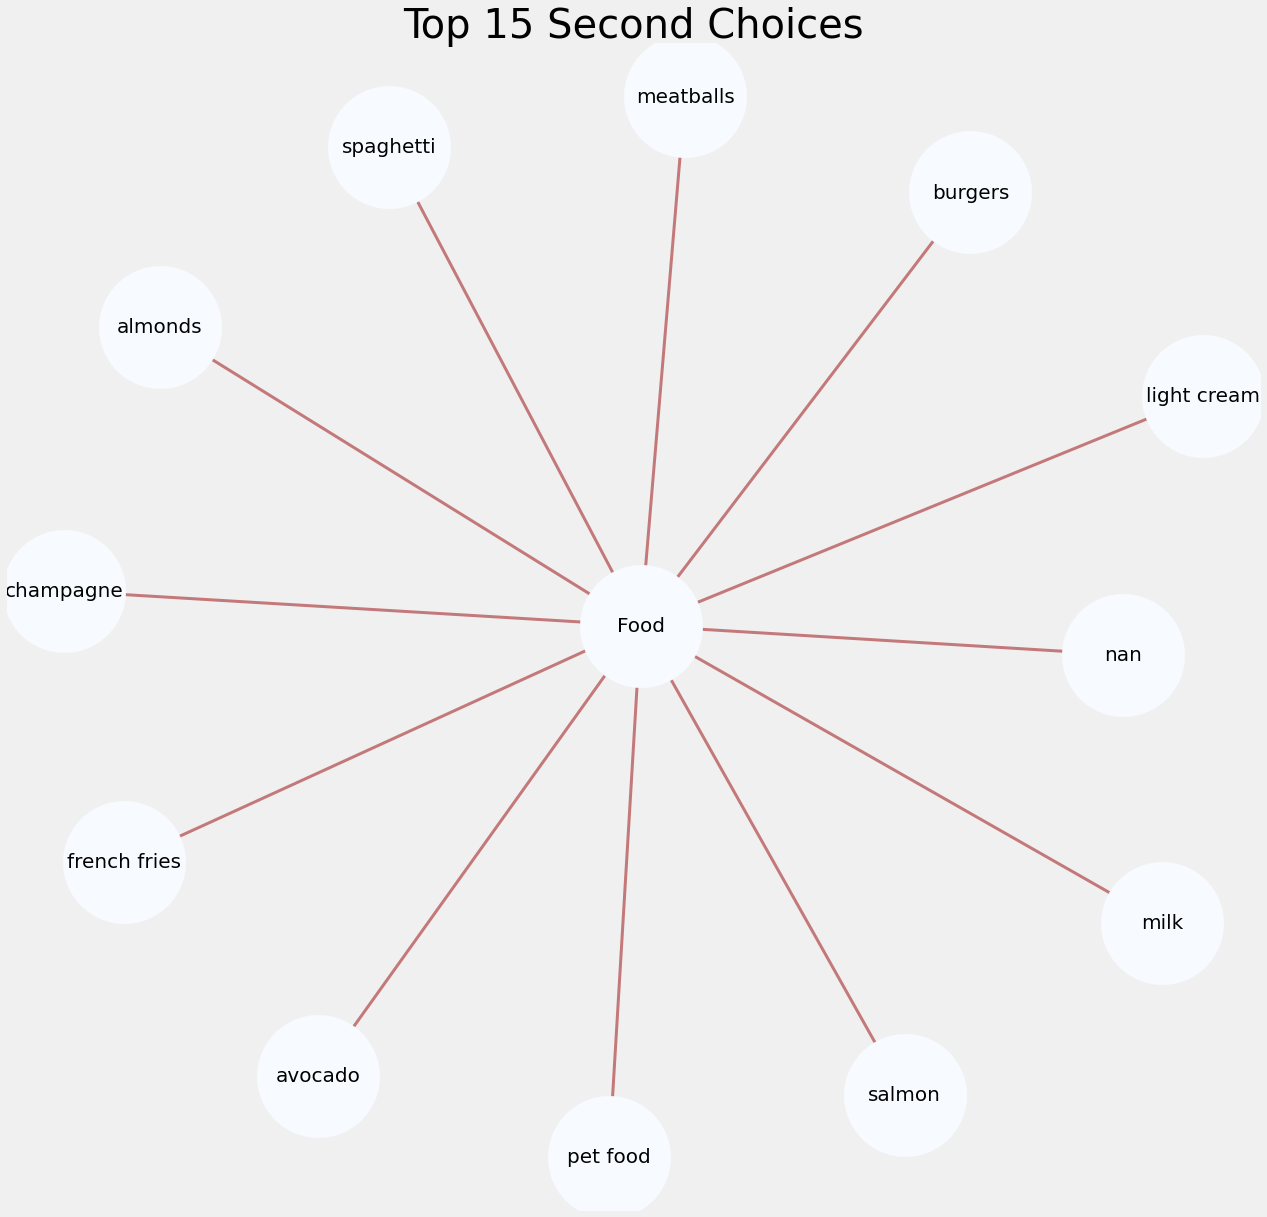

In [18]:
# To visualize Top 15 Second Choices
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(secondchoice)
color = plt.cm.Blues(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(secondchoice, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(secondchoice, pos, width = 3, alpha = 0.6, edge_color = 'brown')
nx.draw_networkx_labels(secondchoice, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 Second Choices', fontsize = 40)
plt.show()

In [19]:
df['thirdchoice'] = 'Third Choice'
secondchoice = df.truncate(before = -1, after = 10)
secondchoice = nx.from_pandas_edgelist(secondchoice, source = 'food', target = 2, edge_attr = True)

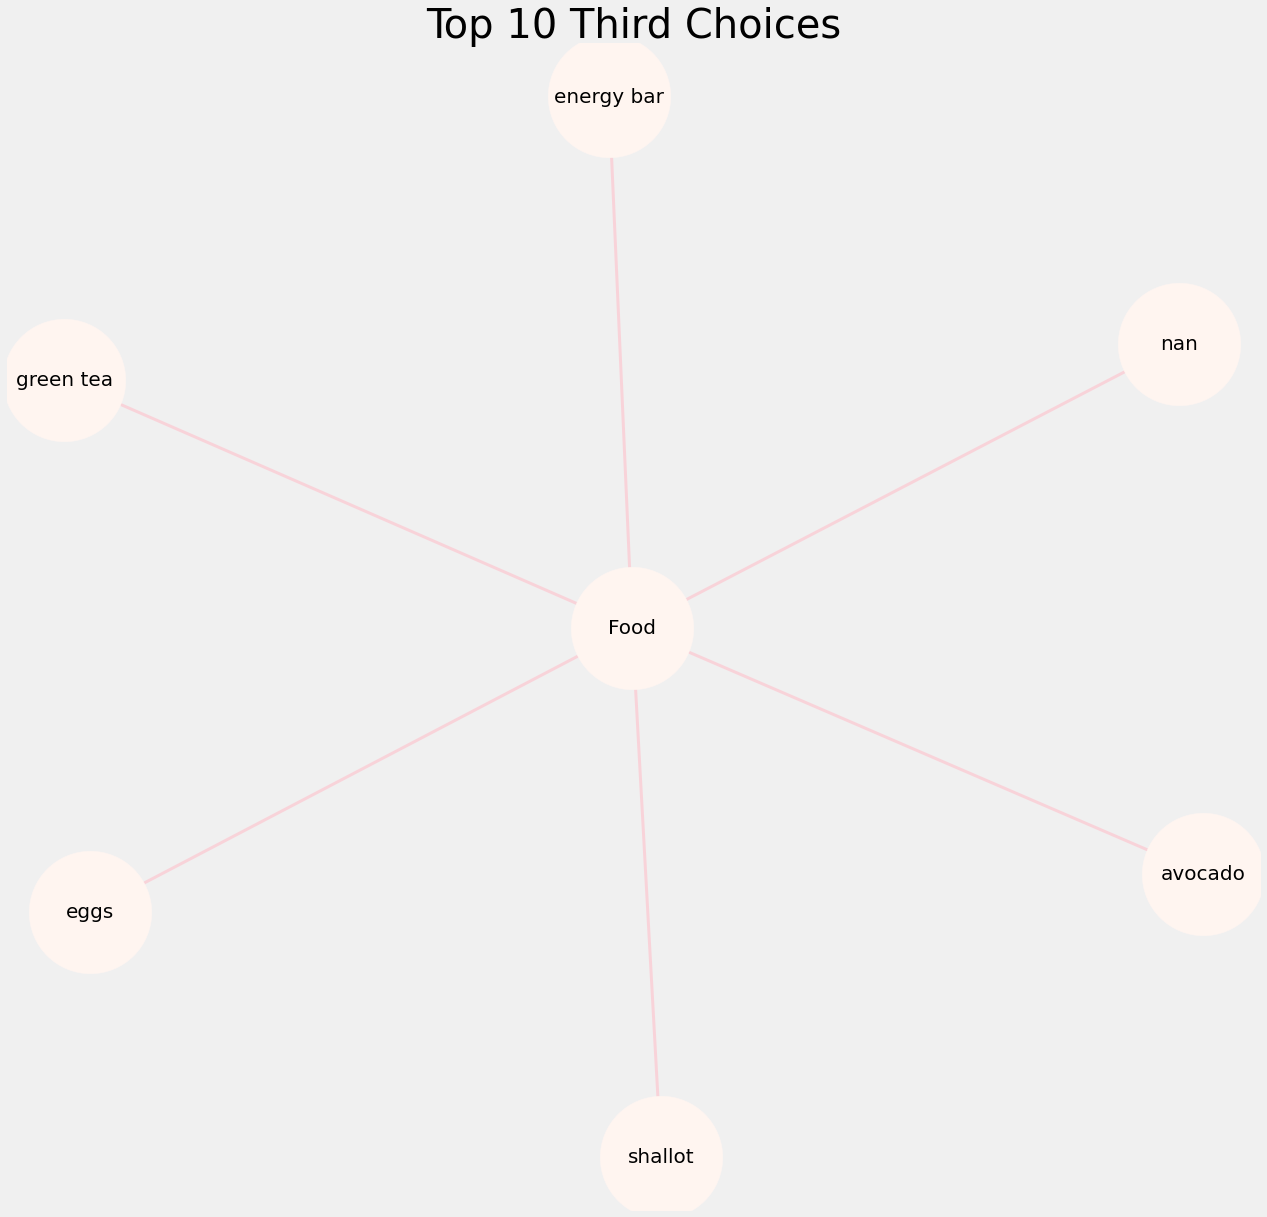

In [20]:
# To visualize Top 10 Third Choices

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(secondchoice)
color = plt.cm.Reds(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(secondchoice, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(secondchoice, pos, width = 3, alpha = 0.6, edge_color = 'pink')
nx.draw_networkx_labels(secondchoice, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 10 Third Choices', fontsize = 40)
plt.show()

In [21]:
# making each customers shopping items an identical list
trans = []
for i in range(0, 7501):
    trans.append([str(df.values[i,j]) for j in range(0, 20)])

# converting it into an numpy array
trans = np.array(trans)

# checking the shape of the array
print(trans.shape)

(7501, 20)


In [22]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns = te.columns_)

# getting the shape of the data
data.shape

(7501, 121)

In [23]:
import warnings
warnings.filterwarnings('ignore')

# getting correlations for 121 items would be messy 
# so let's reduce the items from 121 to 50

data = data.loc[:, ['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables', 'spaghetti',
                    'shrimp', 'grated cheese', 'eggs', 'cookies', 'french fries', 'herb & pepper', 'ground beef',
                    'tomatoes', 'milk', 'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
                    'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar', 'olive oil', 'champagne', 
                    'avocado', 'pepper', 'butter', 'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 
                    'chicken', 'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie', 'yogurt cake']]

# checking the shape
data.shape

(7501, 40)

In [24]:
# let's check the columns
data.columns

Index(['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables',
       'spaghetti', 'shrimp', 'grated cheese', 'eggs', 'cookies',
       'french fries', 'herb & pepper', 'ground beef', 'tomatoes', 'milk',
       'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
       'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar',
       'olive oil', 'champagne', 'avocado', 'pepper', 'butter',
       'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 'chicken',
       'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie',
       'yogurt cake'],
      dtype='object')

In [25]:
# getting the head of the data
data.head()

,mineral water,burgers,turkey,chocolate,frozen vegetables,spaghetti,shrimp,grated cheese,eggs,cookies,...,butter,parmesan cheese,whole wheat rice,low fat yogurt,chicken,vegetables mix,pickles,meatballs,frozen smoothie,yogurt cake
0,True,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,True,False
1,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


#### 4. Apriori Algorithm

This algorrithm is used to find the frequent itemsets and association rules.

Condition I. Value Set as, 
Support : 0.003
Length : 2

In [26]:
from mlxtend.frequent_patterns import apriori

#Now, let us return the items and itemsets with 3% support:
apriori(data, min_support = 0.003, use_colnames = True)

,support,itemsets
0,0.238368,(mineral water)
1,0.087188,(burgers)
2,0.062525,(turkey)
3,0.163845,(chocolate)
4,0.095321,(frozen vegetables)
...,...,...
995,0.003333,"(mineral water, eggs, ground beef, milk)"
996,0.003066,"(spaghetti, chocolate, frozen vegetables, grou..."
997,0.003466,"(chocolate, frozen vegetables, spaghetti, milk)"
998,0.003066,"(chocolate, eggs, spaghetti, ground beef)"


In [27]:
frequent_itemsets = apriori(data, min_support = 0.003, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.087188,(burgers),1
2,0.062525,(turkey),1
3,0.163845,(chocolate),1
4,0.095321,(frozen vegetables),1
...,...,...,...
995,0.003333,"(mineral water, eggs, ground beef, milk)",4
996,0.003066,"(spaghetti, chocolate, frozen vegetables, grou...",4
997,0.003466,"(chocolate, frozen vegetables, spaghetti, milk)",4
998,0.003066,"(chocolate, eggs, spaghetti, ground beef)",4


In [28]:
# getting the item sets with length = 2 and support more than 3%

frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.003) ]

,support,itemsets,length
40,0.024397,"(mineral water, burgers)",2
41,0.019197,"(mineral water, turkey)",2
42,0.052660,"(mineral water, chocolate)",2
43,0.035729,"(mineral water, frozen vegetables)",2
44,0.059725,"(mineral water, spaghetti)",2
...,...,...,...
495,0.004399,"(chicken, low fat yogurt)",2
496,0.007332,"(frozen smoothie, low fat yogurt)",2
497,0.003200,"(chicken, meatballs)",2
498,0.006666,"(chicken, frozen smoothie)",2


Condition II. Value Set as, 
Support : 0.004
Length : 2

In [29]:
from mlxtend.frequent_patterns import apriori

#Now, let us return the items and itemsets with at least 4% support:
apriori(data, min_support = 0.004, use_colnames = True)

,support,itemsets
0,0.238368,(mineral water)
1,0.087188,(burgers)
2,0.062525,(turkey)
3,0.163845,(chocolate)
4,0.095321,(frozen vegetables)
...,...,...
670,0.004133,"(mineral water, eggs, milk, chocolate)"
671,0.004399,"(mineral water, spaghetti, frozen vegetables, ..."
672,0.004533,"(mineral water, frozen vegetables, spaghetti, ..."
673,0.004399,"(mineral water, eggs, spaghetti, milk)"


In [30]:
frequent_itemsets = apriori(data, min_support = 0.004, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.087188,(burgers),1
2,0.062525,(turkey),1
3,0.163845,(chocolate),1
4,0.095321,(frozen vegetables),1
...,...,...,...
670,0.004133,"(mineral water, eggs, milk, chocolate)",4
671,0.004399,"(mineral water, spaghetti, frozen vegetables, ...",4
672,0.004533,"(mineral water, frozen vegetables, spaghetti, ...",4
673,0.004399,"(mineral water, eggs, spaghetti, milk)",4


In [32]:
# getting the item sets with length = 2 and support more than 4%

frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.004) ]

,support,itemsets,length
40,0.024397,"(mineral water, burgers)",2
41,0.019197,"(mineral water, turkey)",2
42,0.052660,"(mineral water, chocolate)",2
43,0.035729,"(mineral water, frozen vegetables)",2
44,0.059725,"(mineral water, spaghetti)",2
...,...,...,...
416,0.005466,"(whole wheat rice, chicken)",2
417,0.005999,"(whole wheat rice, frozen smoothie)",2
418,0.004399,"(chicken, low fat yogurt)",2
419,0.007332,"(frozen smoothie, low fat yogurt)",2


Condition III. Value Set as, 
Support : 0.004
Length : 4

In [34]:
from mlxtend.frequent_patterns import apriori

#Now, let us return the items and itemsets with at least 4% support:
apriori(data, min_support = 0.004, use_colnames = True)

,support,itemsets
0,0.238368,(mineral water)
1,0.087188,(burgers)
2,0.062525,(turkey)
3,0.163845,(chocolate)
4,0.095321,(frozen vegetables)
...,...,...
670,0.004133,"(mineral water, eggs, milk, chocolate)"
671,0.004399,"(mineral water, spaghetti, frozen vegetables, ..."
672,0.004533,"(mineral water, frozen vegetables, spaghetti, ..."
673,0.004399,"(mineral water, eggs, spaghetti, milk)"


In [35]:
frequent_itemsets = apriori(data, min_support = 0.004, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.087188,(burgers),1
2,0.062525,(turkey),1
3,0.163845,(chocolate),1
4,0.095321,(frozen vegetables),1
...,...,...,...
670,0.004133,"(mineral water, eggs, milk, chocolate)",4
671,0.004399,"(mineral water, spaghetti, frozen vegetables, ...",4
672,0.004533,"(mineral water, frozen vegetables, spaghetti, ...",4
673,0.004399,"(mineral water, eggs, spaghetti, milk)",4


In [36]:
# getting the item sets with length = 4 and support more than 4%

frequent_itemsets[ (frequent_itemsets['length'] == 4) &
                   (frequent_itemsets['support'] >= 0.004) ]

,support,itemsets,length
667,0.004133,"(mineral water, chocolate, frozen vegetables, ...",4
668,0.004533,"(mineral water, eggs, spaghetti, chocolate)",4
669,0.004933,"(mineral water, chocolate, spaghetti, milk)",4
670,0.004133,"(mineral water, eggs, milk, chocolate)",4
671,0.004399,"(mineral water, spaghetti, frozen vegetables, ...",4
672,0.004533,"(mineral water, frozen vegetables, spaghetti, ...",4
673,0.004399,"(mineral water, eggs, spaghetti, milk)",4
674,0.004399,"(mineral water, spaghetti, ground beef, milk)",4


In [37]:
# To find the value of the support, confidence, lift and conviction
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(mineral water),(burgers),0.238368,0.087188,0.024397,0.102349,1.173883,0.003614,1.016889
1,(burgers),(mineral water),0.087188,0.238368,0.024397,0.279817,1.173883,0.003614,1.057552
2,(mineral water),(turkey),0.238368,0.062525,0.019197,0.080537,1.288075,0.004293,1.019590
3,(turkey),(mineral water),0.062525,0.238368,0.019197,0.307036,1.288075,0.004293,1.099093
4,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256


In [38]:
# To filter the itemsets that has lift value equals or more than 1 and value of confidence equals or more than 0.5
rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.5) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
714,"(frozen vegetables, turkey)",(mineral water),0.008799,0.238368,0.004399,0.500000,2.097595,0.002302,1.523264
732,"(turkey, milk)",(mineral water),0.011332,0.238368,0.006133,0.541176,2.270338,0.003431,1.659967
806,"(chocolate, soup)",(mineral water),0.010132,0.238368,0.005599,0.552632,2.318395,0.003184,1.702471
812,"(chocolate, olive oil)",(mineral water),0.016398,0.238368,0.008266,0.504065,2.114649,0.004357,1.535749
824,"(chicken, chocolate)",(mineral water),0.014665,0.238368,0.007599,0.518182,2.173871,0.004103,1.580745
860,"(frozen vegetables, ground beef)",(mineral water),0.016931,0.238368,0.009199,0.543307,2.279277,0.005163,1.667711
894,"(soup, frozen vegetables)",(mineral water),0.007999,0.238368,0.005066,0.633333,2.656954,0.003159,2.077178
900,"(olive oil, frozen vegetables)",(mineral water),0.011332,0.238368,0.006532,0.576471,2.418404,0.003831,1.798297
988,"(soup, spaghetti)",(mineral water),0.014265,0.238368,0.007466,0.523364,2.195614,0.004065,1.597933
1048,"(shrimp, olive oil)",(mineral water),0.008132,0.238368,0.004533,0.557377,2.338303,0.002594,1.720724


**RESULT**

The result from the a-priori algorithm is shown below.

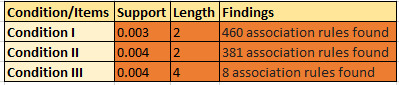

In [42]:
from IPython.display import Image
Image(filename='B1.jpeg')

***Table I***

From the table above, the highest association rules found is when Support is set to 0.003 and length set to 2.
The lowest association rules found when Support is set to 0.004 and length set to 4.

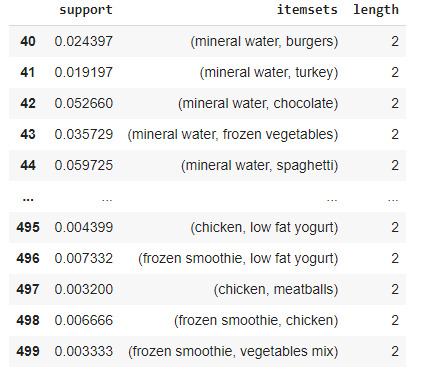

In [43]:
from IPython.display import Image
Image(filename='B2.jpeg')

***Figure I***

Refer to the Figure I above, it is to find the support for each itemsets. The higher the support number, indicate that the itemsets occured frequently. 
For instance, itemsets (mineral water, spaghetti) with support value 0.059725 are occured more frequent than itemsets (mineral water, burgers) with support value 0.024397.

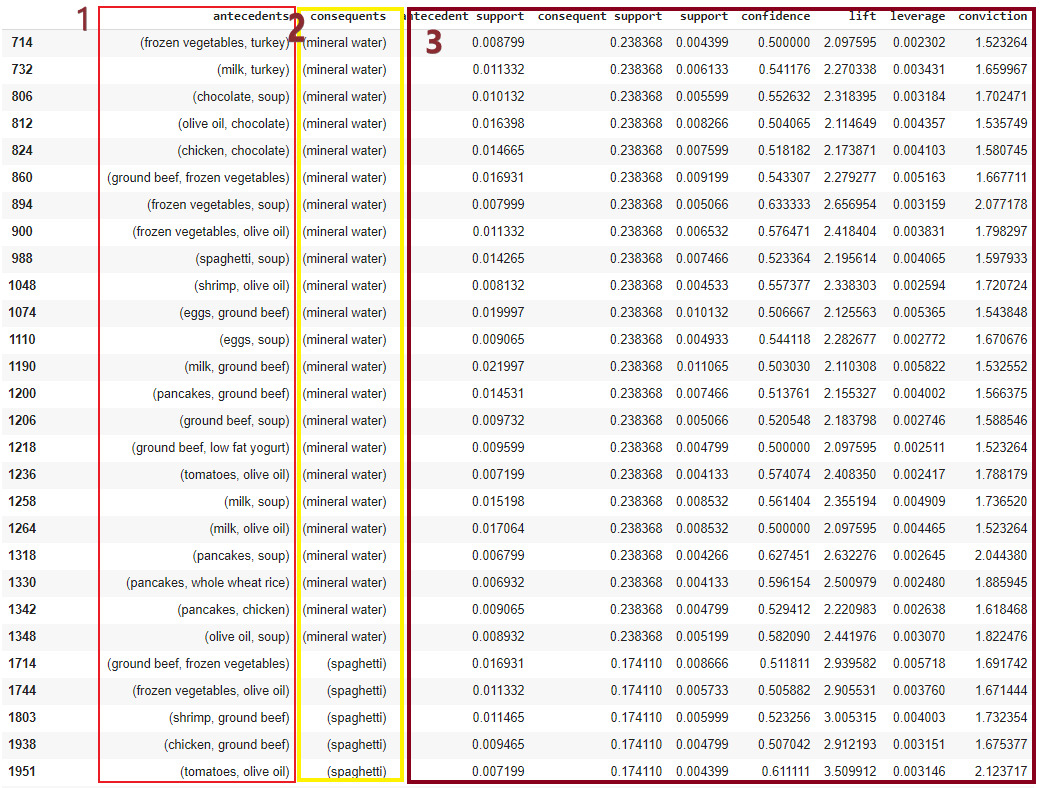

In [44]:
from IPython.display import Image
Image(filename='B3.jpeg')

***Figure II***

Figure II above showing the key metrics of rules found. Those in box 1,or  antecedents column is list of the itemsets you bought and the second box indicate with 2 or consequents, showing the item that you might buy if you buy itemsets in 1. Those columns in box 3, is a calculated metrices of the associated rules.

**EVALUATION AND DISCUSSION** <br>

Now this is the part of figuring out what the data is telling us. <br>

1. Lift

There are quite a few rules with a **high lift value** which means that it occurs more frequently than would be expected based on the given number of transaction and product combinations. <br>

Lift values that are more than 1 could be indicative of a useful rule pattern (more likely to be bought together). <br>

Lift value that is negative shows that there is a negative correlation.<br>

Lift value that is positive shows that there is a positive correlation.<br>

Lift value ratio that is equals to 1 shows that there the items are independent (no correlation). 

2. Support

Support refers to how often a given rule appears in the dataset being mined. For example, we will consider the support regarding the purchase of (burgers, olive oil) with (mineral water). The value of support is 0.00333. This means that at least 33 times out of a total of 10,000 transactions that the itemset will occur. 

3. Confidence

A confidence of 0.5 means that 50% of the cases where antecedent item  and consequent item are purchased together. For example, there is a 50% chance that (turkey, frozen vegetables) and (mineral water) are bought together. <br>

There is also chances where we can get high support but low confidence. This happens when a rule show a strong correlation in a dataset because it appears very often but may occur far less when applied. 

4. Conviction 

Compares the probability that antecedent item appears without consequent item if they were dependent. For example, the conviction rule for (burgers, olive oil) and (mineral water) was 1.589 means that the rule will be incorrect 59% more often if the association between (burgers, olive oil) and (mineral water) was purely random chance. 

**LIMITATION OF THE RESULTS** <br>

The limitation of the result is the difficulties to tell on which week or when does the frequently bought itemset occured based on the dataset. This is because the dates are not recorded in the dataset. It is hard to analyze and make a future prediction from the dataset given. It is essential for the owner to predict and plan their inventory cost to increase the profits and avoid any losses due to improper inventory planning. 


**CONCLUSION AND FUTURE WORK**

From observations, mineral water is the most bought consequents item regardless of the antecedents itemsets category. Noticeable that people whom bought ground beef will highly bought the spaghetti together. It is also noticed that the lower value of support, lift and confidence is set, the more significant rules generated.

There are also many other complex alternatives that can be utilized to analyze the data such as regression, Neural Networks, clustering and many more. The challenges that most of data scientists faced when using the algorithms are, they can be difficult to tune, hard to be interpreted and in need of feature engineering to produce an excellent and accurate results. The algorithms require an intensive knowledge to implement them in the analysis. 

Associate analysis is another option that requires a light mathematical concept, and it has a less complicated algorithm to explain to the non-technical people. It can be implemented in Python by using the MLxtend library. It is an unsupervised learning algorithm that searches for hidden patterns without completely relying on the data prep and feature engineering which eases the process of the data analysis. 

This work can be further continued to analyze the peak seasons for the itemsets to be bought together. This will helps the owner to predict when and how much the inventory cost should be spent and thus helps to generate a better growing economy.

**REREFENCES**

1. https://www.kaggle.com/yugagrawal95/market-basket-analysis-apriori-in-python <br> <br>
    
2. https://pbpython.com/market-basket-analysis.html